In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, cross_validation, neighbors, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data=pd.read_csv('C:/Users/Master/DS/Breast cancer prediction/Breast-cancer-risk-prediction-master\Breast-cancer-risk-prediction-master/data/data.csv', index_col = 0)
data.info()
pd.set_option('display.max_columns', 500)
#data.set_index('id', inplace = True)
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se         

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#diagnosis = {'M': 1,'B': 0} 
#data.diagnosis = [diagnosis[item] for item in data.diagnosis] 
#data.head()

#data.diagnosis[data.diagnosis == 'M'] = 1
#data.Gender[data.diagnosis == 'B'] = 0

In [ ]:
diagnosis_all = list(data.shape)[0]
diagnosis_categories = list(data['diagnosis'].value_counts())
print("\n \t The data has {} diagnosis, {} malignant and {} benign.".format(diagnosis_all, 
diagnosis_categories[0], diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 malignant and 212 benign.


In [ ]:
features_mean= list(data.columns[0:31])
features_mean

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
#feature selection with chi squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#feature selection with chi squared test
array = data.values
print (array)
X = array[:,1:31]
Y = array[:,0]
#print("THIS IS X", X)
#print("THIS IS Y", Y)
test = SelectKBest(score_func=chi2, k=1)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features top1
print(features[0:2,:])

[[ 1.    17.99  10.38  ...  0.265  0.46   0.119]
 [ 1.    20.57  17.77  ...  0.186  0.275  0.089]
 [ 1.    19.69  21.25  ...  0.243  0.361  0.088]
 ...
 [ 1.    16.6   28.08  ...  0.142  0.222  0.078]
 [ 1.    20.6   29.33  ...  0.265  0.409  0.124]
 [ 0.     7.76  24.54  ...  0.     0.287  0.07 ]]
[2.661e+02 9.390e+01 2.011e+03 5.399e+04 1.499e-01 5.403e+00 1.971e+01
 1.054e+01 2.574e-01 7.431e-05 3.468e+01 9.794e-03 2.506e+02 8.759e+03
 3.266e-03 6.138e-01 1.045e+00 3.052e-01 8.036e-05 6.371e-03 4.917e+02
 1.744e+02 3.665e+03 1.126e+05 3.974e-01 1.931e+01 3.952e+01 1.349e+01
 1.299e+00 2.315e-01]
[[2019.]
 [1956.]]


In [ ]:
#"area_worst" is the top 1 feature 
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
features = fit.transform(X)
# summarize selected features top2
print(features[0:2,:])

[[1001. 2019.]
 [1326. 1956.]]


In [ ]:
#"area_worst" and "area_mean" are the top 2 features
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
features = fit.transform(X)
# summarize selected features top3
print(features[0:2,:])

[[1001.    153.4  2019.  ]
 [1326.     74.08 1956.  ]]


In [ ]:
#"area_worst", "area_mean", and "area_se" are the top three features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
features = fit.transform(X)
# summarize selected features
print(features[0:2,:])

[[1001.    153.4   184.6  2019.  ]
 [1326.     74.08  158.8  1956.  ]]


In [ ]:
#"area_worst", "area_mean", "perimeter_worst", and "area_se" are the top four features

In [ ]:
# All features are used in models
#data.replace("?", -99999, inplace=True)
#data = data.drop(['id'], axis=1)
#print (data)
array = data.values
X = array[:, 1:32]
y = array[:,0]
X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.33)
#print ("x is ", X)
#print (" y is :", y)
#print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create an SVM classifier and train it on 67% of the data set
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_svm_all = clf.score(X_test, y_test)
print ("SVC accuracy is ",accuracy_svm_all)

# Create an Kneighbors classifier and train it on 67% of the data set
knc = neighbors.KNeighborsClassifier()
knc.fit(X_train, y_train)
accuracy_knc_all = knc.score(X_test, y_test)
print ("knc accuracy is ", accuracy_knc_all)

# Create an Logistic Regression and train it on 67% of the data set
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr_all = lr.score(X_test, y_test)
print ("lr accuracy is ", accuracy_lr_all)

# Create an DecisionTree and train it on 67% of the data set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt_all = dt.score(X_test, y_test)
print ("dt accuracy is ", accuracy_dt_all)

# Create an RandomForest and train it on 67% of the data set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf_all = rf.score(X_test, y_test)
print ("rf accuracy is ", accuracy_rf_all)

SVC accuracy is  0.6595744680851063
knc accuracy is  0.9414893617021277
lr accuracy is  0.9680851063829787
dt accuracy is  0.9308510638297872
rf accuracy is  0.9787234042553191


In [ ]:
# use the single best column to run ml
X = array[:, 24:25]
y = array[:, 0]
X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.33)
#print ("x is ", X)
#print (" y is :", y)
#print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)


# Create an SVM classifier and train it on 67% of the data set
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_svm_one = clf.score(X_test, y_test)
print ("SVC accuracy is ",accuracy_svm_one)

# Create an Kneighbors classifier and train it on 67% of the data set
knc = neighbors.KNeighborsClassifier()
knc.fit(X_train, y_train)
accuracy_knc_one = knc.score(X_test, y_test)
print ("knc accuracy is ", accuracy_knc_one)

# Create an Logistic Regression and train it on 67% of the data set
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr_one = lr.score(X_test, y_test)
print ("lr accuracy is ", accuracy_lr_one)

# Create an DecisionTree and train it on 67% of the data set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt_one = dt.score(X_test, y_test)
print ("dt accuracy is ", accuracy_dt_one)

# Create an RandomForest and train it on 67% of the data set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf_one = rf.score(X_test, y_test)
print ("rf accuracy is ", accuracy_rf_one)


SVC accuracy is  0.6702127659574468
knc accuracy is  0.9042553191489362
lr accuracy is  0.9202127659574468
dt accuracy is  0.8670212765957447
rf accuracy is  0.8776595744680851


In [ ]:
# use the two best columns to run ml
 
X = data.iloc[:,[4,24]].as_matrix()
y = array[:, 0]
X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.33)
#print ("x is ", X)
#print (" y is :", y)
#print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create an SVM classifier and train it on 67% of the data set
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_svm_two = clf.score(X_test, y_test)
print ("SVC accuracy is ",accuracy_svm_two)

# Create an Kneighbors classifier and train it on 67% of the data set
knc = neighbors.KNeighborsClassifier()
knc.fit(X_train, y_train)
accuracy_knc_two = knc.score(X_test, y_test)
print ("knc accuracy is ", accuracy_knc_two)

# Create an Logistic Regression and train it on 67% of the data set
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr_two = lr.score(X_test, y_test)
print ("lr accuracy is ", accuracy_lr_two)

# Create an DecisionTree and train it on 67% of the data set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt_two = dt.score(X_test, y_test)
print ("dt accuracy is ", accuracy_dt_two)

# Create an RandomForest and train it on 67% of the data set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf_two = rf.score(X_test, y_test)
print ("rf accuracy is ", accuracy_rf_two)

SVC accuracy is  0.6170212765957447
knc accuracy is  0.9202127659574468
lr accuracy is  0.9202127659574468
dt accuracy is  0.9042553191489362
rf accuracy is  0.9095744680851063


In [ ]:
# use the three best columns to run ml
 
X = data.iloc[:,[4,14, 24]].as_matrix()
y = array[:, 0]
X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.33)
#print ("x is ", X)
#print (" y is :", y)
#print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create an SVM classifier and train it on 67% of the data set
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_svm_three = clf.score(X_test, y_test)
print ("SVC accuracy is ",accuracy_svm_three)

# Create an Kneighbors classifier and train it on 67% of the data set
knc = neighbors.KNeighborsClassifier()
knc.fit(X_train, y_train)
accuracy_knc_three = knc.score(X_test, y_test)
print ("knc accuracy is ", accuracy_knc_three)

# Create an Logistic Regression and train it on 67% of the data set
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr_three = lr.score(X_test, y_test)
print ("lr accuracy is ", accuracy_lr_three)

# Create an DecisionTree and train it on 67% of the data set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt_three = dt.score(X_test, y_test)
print ("dt accuracy is ", accuracy_dt_three)

# Create an RandomForest and train it on 67% of the data set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf_three = rf.score(X_test, y_test)
print ("rf accuracy is ", accuracy_rf_three)

SVC accuracy is  0.601063829787234
knc accuracy is  0.925531914893617
lr accuracy is  0.9468085106382979
dt accuracy is  0.9414893617021277
rf accuracy is  0.925531914893617


In [ ]:
# use the four best columns to run ml
 
X = data.iloc[:,[3, 4,14,15]].as_matrix()
y = array[:, 0]
X_train, X_test, y_train, y_test = cross_validation.train_test_split( X, y, test_size=0.33)
#print ("x is ", X)
#print (" y is :", y)
#print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Create an SVM classifier and train it on 67% of the data set
clf = svm.SVC()
clf.fit(X_train, y_train)
accuracy_svm_four = clf.score(X_test, y_test)
print ("SVC accuracy is ",accuracy_svm_four)

# Create an Kneighbors classifier and train it on 67% of the data set
knc = neighbors.KNeighborsClassifier()
knc.fit(X_train, y_train)
accuracy_knc_four = knc.score(X_test, y_test)
print ("knc accuracy is ", accuracy_knc_four)

# Create an Logistic Regression and train it on 67% of the data set
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr_four = lr.score(X_test, y_test)
print ("lr accuracy is ", accuracy_lr_four)

# Create an DecisionTree and train it on 67% of the data set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
accuracy_dt_four = dt.score(X_test, y_test)
print ("dt accuracy is ", accuracy_dt_four)

# Create an RandomForest and train it on 67% of the data set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
accuracy_rf_four = rf.score(X_test, y_test)
print ("rf accuracy is ", accuracy_rf_four)

SVC accuracy is  0.6648936170212766
knc accuracy is  0.8670212765957447
lr accuracy is  0.8829787234042553
dt accuracy is  0.8457446808510638
rf accuracy is  0.8776595744680851


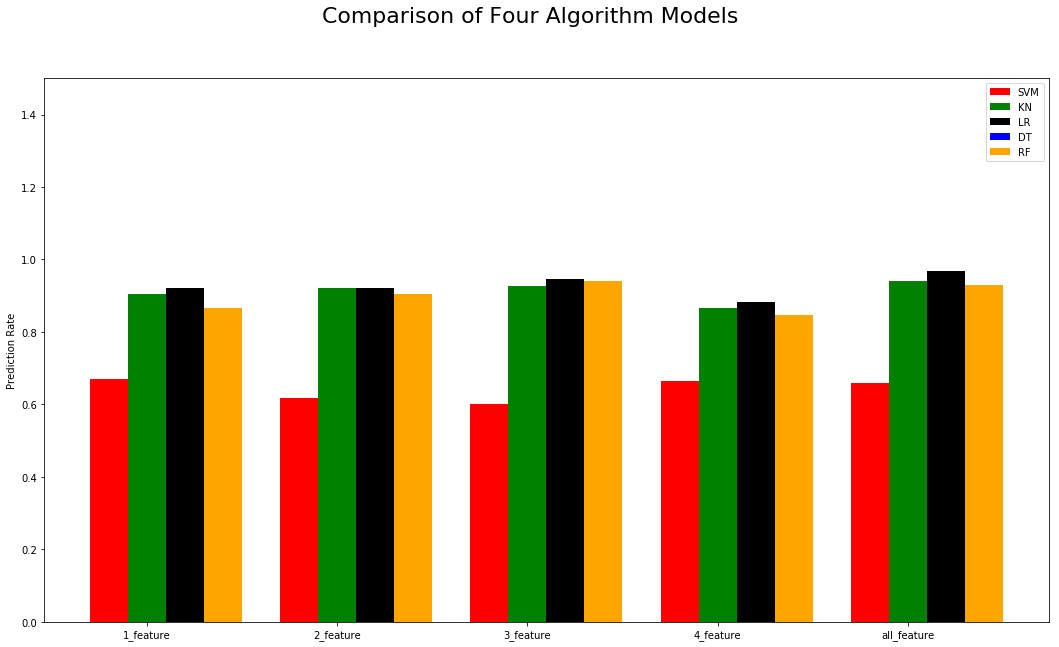

In [ ]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

SVCvals = [accuracy_svm_one, accuracy_svm_two, accuracy_svm_three, accuracy_svm_four, accuracy_svm_all]
rects1 = ax.bar(ind, SVCvals, width, color='r')
kncvals = [accuracy_knc_one, accuracy_knc_two, accuracy_knc_three, accuracy_knc_four, accuracy_knc_all]
rects2 = ax.bar(ind+width, kncvals, width, color='g')
lrvals = [accuracy_lr_one, accuracy_lr_two, accuracy_lr_three, accuracy_lr_four, accuracy_lr_all]
rects3 = ax.bar(ind+width*2, lrvals, width, color='black')
dtvals = [accuracy_dt_one, accuracy_dt_two, accuracy_dt_three, accuracy_dt_four, accuracy_dt_all]
rects4 = ax.bar(ind+width*3, dtvals, width, color='blue')
rfvals = [accuracy_rf_one, accuracy_rf_two, accuracy_rf_three, accuracy_rf_four, accuracy_rf_all]
rects5 = ax.bar(ind+width*3, dtvals, width, color='orange')

ax.set_ylabel('Prediction Rate')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('1_feature', '2_feature', '3_feature','4_feature', 'all_feature' ) )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0]), ('SVM', 'KN', 'LR', 'DT', 'RF') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
fig.suptitle('Comparison of Four Algorithm Models', fontsize=22)        
fig.set_size_inches(18, 10)
plt.rcParams.update({'font.size': 20})
ax.set_ylim(0,1.5)
#plt.legend(fontsize=14)
#autolabel(rects1)
#autolabel(rects2)
#autolabel(rects3)
#autolabel(rects4)
plt.show()